# Data Visualisation des titres  /                                   Data Visualization of Titles

### Importation des libraires nécessaires/Import the required libraries

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from textblob import TextBlob  
import seaborn as sns


### Chargement et Préparation des Données/ Data loading and preparation

In [22]:
news_data  = pd.read_csv('news_data.csv')
news_data.head()

,Unnamed: 0,title,link,published,Category
0,0,L'avenir politique de la France passera par le...,https://news.google.com/rss/articles/CBMiW2h0d...,"Wed, 09 Aug 2023 17:00:00 GMT",politique
1,1,"Bernard Arnault et les politiques, la puissanc...",https://news.google.com/rss/articles/CBMimwFod...,"Tue, 08 Aug 2023 03:30:07 GMT",politique
2,2,Politique. Aurélie Sivignon élue maire de Sain...,https://news.google.com/rss/articles/CBMiVmh0d...,"Wed, 09 Aug 2023 21:32:00 GMT",politique
3,3,"Roger Karoutchi, sénateur LR, sur le Niger : ""...",https://news.google.com/rss/articles/CBMi5AFod...,"Tue, 08 Aug 2023 09:21:39 GMT",politique
4,4,La politique migratoire de l'Union européenne ...,https://news.google.com/rss/articles/CBMicGh0d...,"Wed, 09 Aug 2023 17:11:37 GMT",politique


In [23]:
news_data_text = news_data['title']
news_data_text

0      L'avenir politique de la France passera par le...
1      Bernard Arnault et les politiques, la puissanc...
2      Politique. Aurélie Sivignon élue maire de Sain...
3      Roger Karoutchi, sénateur LR, sur le Niger : "...
4      La politique migratoire de l'Union européenne ...
                             ...                        
885    Pourquoi l'écrivaine George Sand s'est-elle ap...
886    À l'office de tourisme et de la culture, « on ...
887    Quiz de culture générale : Connaissez-vous bie...
888    CULTURE FOOD. Escapade « à la noix » du côté d...
889    Problème de connexion : contactez notre servic...
Name: title, Length: 890, dtype: object

In [24]:
# lower and remove punctuation/Convertir en minuscules et suppression de la ponctuation
import re
import string
news_data ['title_cleaned'] = news_data ['title'].str.lower() .apply(lambda x: re.sub(f'[{re.escape(string.punctuation)}]', '', x))
news_data 

,Unnamed: 0,title,link,published,Category,title_cleaned
0,0,L'avenir politique de la France passera par le...,https://news.google.com/rss/articles/CBMiW2h0d...,"Wed, 09 Aug 2023 17:00:00 GMT",politique,lavenir politique de la france passera par les...
1,1,"Bernard Arnault et les politiques, la puissanc...",https://news.google.com/rss/articles/CBMimwFod...,"Tue, 08 Aug 2023 03:30:07 GMT",politique,bernard arnault et les politiques la puissance...
2,2,Politique. Aurélie Sivignon élue maire de Sain...,https://news.google.com/rss/articles/CBMiVmh0d...,"Wed, 09 Aug 2023 21:32:00 GMT",politique,politique aurélie sivignon élue maire de saint...
3,3,"Roger Karoutchi, sénateur LR, sur le Niger : ""...",https://news.google.com/rss/articles/CBMi5AFod...,"Tue, 08 Aug 2023 09:21:39 GMT",politique,roger karoutchi sénateur lr sur le niger revo...
4,4,La politique migratoire de l'Union européenne ...,https://news.google.com/rss/articles/CBMicGh0d...,"Wed, 09 Aug 2023 17:11:37 GMT",politique,la politique migratoire de lunion européenne f...
...,...,...,...,...,...,...
885,885,Pourquoi l'écrivaine George Sand s'est-elle ap...,https://news.google.com/rss/articles/CBMib2h0d...,"Wed, 09 Aug 2023 05:01:00 GMT",Culture,pourquoi lécrivaine george sand sestelle appel...
886,886,"À l'office de tourisme et de la culture, « on ...",https://news.google.com/rss/articles/CBMisgFod...,"Wed, 02 Aug 2023 04:30:10 GMT",Culture,à loffice de tourisme et de la culture « on re...
887,887,Quiz de culture générale : Connaissez-vous bie...,https://news.google.com/rss/articles/CBMiXmh0d...,"Thu, 27 Jul 2023 07:00:00 GMT",Culture,quiz de culture générale connaissezvous bien ...
888,888,CULTURE FOOD. Escapade « à la noix » du côté d...,https://news.google.com/rss/articles/CBMiZGh0d...,"Fri, 04 Aug 2023 16:29:00 GMT",Culture,culture food escapade « à la noix » du côté de...


In [25]:
# remove redundant spaces/ suppression des espaces redondants
news_data ['title_cleaned'] = news_data ['title_cleaned'].str.strip()
news_data 

,Unnamed: 0,title,link,published,Category,title_cleaned
0,0,L'avenir politique de la France passera par le...,https://news.google.com/rss/articles/CBMiW2h0d...,"Wed, 09 Aug 2023 17:00:00 GMT",politique,lavenir politique de la france passera par les...
1,1,"Bernard Arnault et les politiques, la puissanc...",https://news.google.com/rss/articles/CBMimwFod...,"Tue, 08 Aug 2023 03:30:07 GMT",politique,bernard arnault et les politiques la puissance...
2,2,Politique. Aurélie Sivignon élue maire de Sain...,https://news.google.com/rss/articles/CBMiVmh0d...,"Wed, 09 Aug 2023 21:32:00 GMT",politique,politique aurélie sivignon élue maire de saint...
3,3,"Roger Karoutchi, sénateur LR, sur le Niger : ""...",https://news.google.com/rss/articles/CBMi5AFod...,"Tue, 08 Aug 2023 09:21:39 GMT",politique,roger karoutchi sénateur lr sur le niger revo...
4,4,La politique migratoire de l'Union européenne ...,https://news.google.com/rss/articles/CBMicGh0d...,"Wed, 09 Aug 2023 17:11:37 GMT",politique,la politique migratoire de lunion européenne f...
...,...,...,...,...,...,...
885,885,Pourquoi l'écrivaine George Sand s'est-elle ap...,https://news.google.com/rss/articles/CBMib2h0d...,"Wed, 09 Aug 2023 05:01:00 GMT",Culture,pourquoi lécrivaine george sand sestelle appel...
886,886,"À l'office de tourisme et de la culture, « on ...",https://news.google.com/rss/articles/CBMisgFod...,"Wed, 02 Aug 2023 04:30:10 GMT",Culture,à loffice de tourisme et de la culture « on re...
887,887,Quiz de culture générale : Connaissez-vous bie...,https://news.google.com/rss/articles/CBMiXmh0d...,"Thu, 27 Jul 2023 07:00:00 GMT",Culture,quiz de culture générale connaissezvous bien ...
888,888,CULTURE FOOD. Escapade « à la noix » du côté d...,https://news.google.com/rss/articles/CBMiZGh0d...,"Fri, 04 Aug 2023 16:29:00 GMT",Culture,culture food escapade « à la noix » du côté de...


### Analyse de sentiment et Calcul de polarité des titres / Sentiment Analysis and Polarity Calculation

In [26]:

news_data ['title_polarity'] = news_data ['title_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
new_polarity = news_data [(news_data ['title_polarity'] != 0)]
new_polarity["title_polarity"].unique()

array([ 0.5       , -0.33333333,  0.22727273, -0.29166667, -0.8       ,
        0.13636364, -0.325     , -0.4       ,  0.1       ,  0.375     ,
       -0.26666667, -0.13181818, -0.225     ,  0.21428571,  0.6       ,
       -0.25      ,  0.3       ,  0.08333333,  0.03333333,  0.35714286,
        0.4       , -0.9       ])

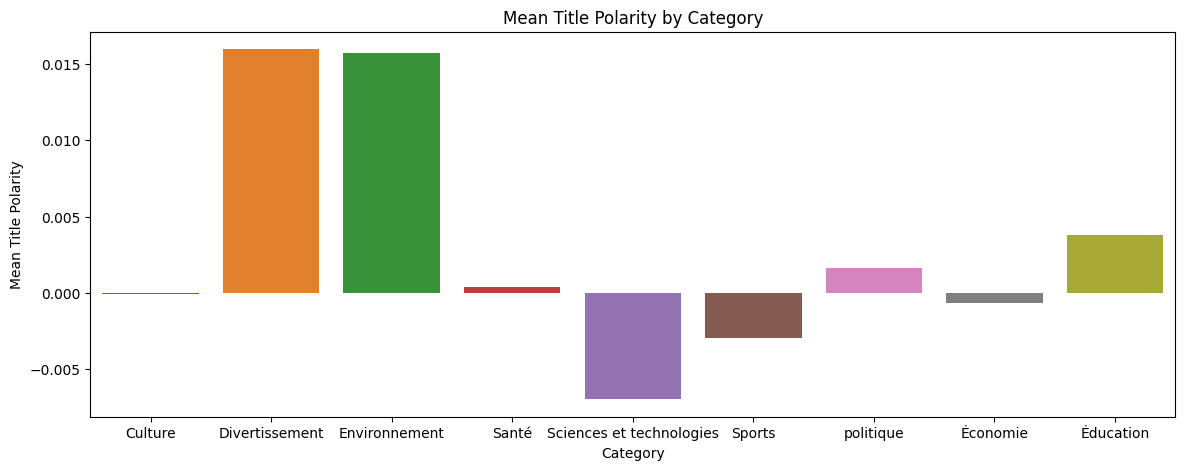

In [27]:

# Group data by 'Category' and calculate the mean polarity for each category
category_polarity_mean = news_data.groupby('Category')['title_polarity'].mean().reset_index()
# Create a bar plot
plt.figure(figsize=(14,5))
sns.barplot(x='Category', y='title_polarity', data=category_polarity_mean)
plt.xlabel('Category')
plt.ylabel('Mean Title Polarity')
plt.title('Mean Title Polarity by Category')
plt.show()


# wordcloud

In [34]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud imported!')

Wordcloud imported!


In [35]:
%pip install --upgrade Pillow 
%pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [36]:

#Calculer le nombre total de mots dans les titres / Calculate the total number of words in the title
total_words = news_data['title'].apply(lambda x: len(x.split())).sum()

#Définir le nombre maximum de mots pour le texte généré / Set the maximum number of words for the generated text
max_words = 90

#Initialiser une chaîne vide pour stocker le texte généré/ Initialize an empty string to store the generated text
word_string = ''

#Générer la chaîne de mots en fonction de la contribution de chaque catégorie au total des mots/ Generate the word string based on the contribution of each category to the total words
for category in news_data['Category'].unique():
    category_data = news_data[news_data['Category'] == category]
    category_total_words = category_data['title'].apply(lambda x: len(x.split())).sum()
    
    repeat_num_times = int(category_total_words / total_words * max_words)
    titles_concatenated = ' '.join(category_data['title'])
    word_string = word_string + ((titles_concatenated + ' ') * repeat_num_times)


print(word_string)



L'avenir politique de la France passera par les seniors | Slate.fr - Slate.fr Bernard Arnault et les politiques, la puissance d'un groupe au cœur de la République - Le Monde Politique. Aurélie Sivignon élue maire de Saint-Micaud - JSL - le Journal de Saone et Loire Roger Karoutchi, sénateur LR, sur le Niger : "Revoir la politique africaine, ça veut dire revoir notre politique de co ... - BFMTV La politique migratoire de l'Union européenne fragilisée au Niger - Le Figaro La Cédéao, une institution économique à forte teneur politique - FRANCE 24 Jamboree scout en Corée : de la « honte nationale » à la crise politique - La Croix Sabrina Agresti-Roubache au JDD : « La politique du chéquier, c'est fini, ça ne marche pas » - Le Journal du dimanche Entre déconnexion et communication… Pourquoi les politiques sont-ils fans de randonnée ? - 20 Minutes Poursuivi dans 200 affaires, Imran Khan voit son avenir politique s'obscurcir - FRANCE 24 Pakistan : le Parlement dissous avant de nouvelles élect

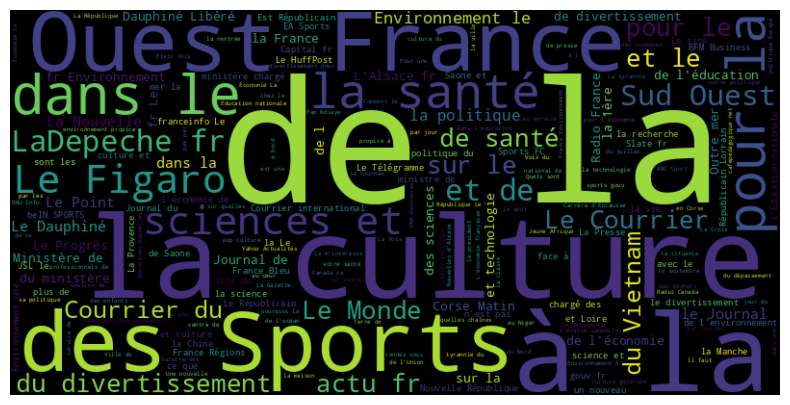

In [40]:

#Créer un objet WordCloud /  Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(word_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Choix des mots à exclure/ Selection of words to exclude

In [41]:
custom_stopwords = {"le", "la", "les", "de", "du", "des", "et", "et", "à", "un", "une", "dans","pas","en", "sur", "pour", "avec","fr", "par", "ce", "cette"}


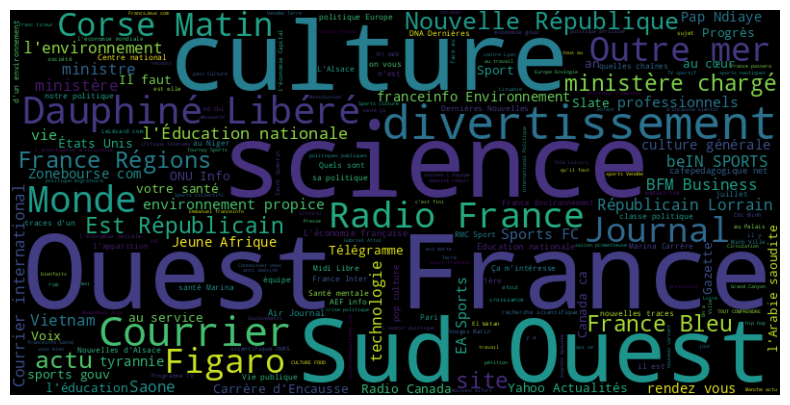

In [42]:
wordcloud = WordCloud(width=800, height=400, background_color='Black', stopwords=custom_stopwords).generate(word_string)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()